In [194]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import nltk

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
# Path 
import os 


In [195]:
DATA_FILE_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data.csv'))
data = pd.read_csv(DATA_FILE_PATH)
data

,href,title,publish_date,content,keyword
0,https://cafef.vn/lai-suat-ngan-hang-lpbank-moi...,Lãi suất ngân hàng LPBank mới nhất tháng 11/20...,05-11-2024 - 20:04 PM,TIN MỚIẢnh minh họaLãi suất tiết kiệm tại quầy...,Lãi suất ngân hàng
1,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 11/20...,05-11-2024 - 20:00 PM,TIN MỚIảnh minh họaLãi suất huy động dành cho ...,Lãi suất ngân hàng
2,https://cafef.vn/lai-suat-ngan-hang-shb-moi-nh...,Lãi suất ngân hàng SHB mới nhất tháng 10/2024:...,05-10-2024 - 15:05 PM,TIN MỚIẢnh minh họaLãi suất tiền gửi tại quầy ...,Lãi suất ngân hàng
3,https://cafef.vn/lai-suat-ngan-hang-quan-doi-m...,Lãi suất Ngân hàng Quân đội (MB) tháng 10/2024...,05-10-2024 - 13:02 PM,TIN MỚIẢnh minh họaLãi suất tiết kiệm dành cho...,Lãi suất ngân hàng
4,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 10/20...,04-10-2024 - 00:30 AM,TIN MỚILãi suất huy động dành cho khách hàng g...,Lãi suất ngân hàng
...,...,...,...,...,...
1984,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng của người Việt dưới tác độn...,03-12-2008 - 16:51 PM,"TIN MỚINgày 27/11 vừa qua, tại khách\r\nsạn Ja...",xu hướng tiêu dùng
1985,https://cafef.vn/vi-mo-dau-tu/man-hinh-lcd-xu-...,Màn hình LCD: xu hướng tiêu dùng mới,04-11-2008 - 10:21 AM,"TIN MỚIKhông quá kỳ vọng, nhưng các nhà bán lẻ...",xu hướng tiêu dùng
1986,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng ở Việt Nam trong bối cảnh l...,05-08-2008 - 07:51 AM,"TIN MỚINhận xét của ông Ralf Matthaes, Tổng gi...",xu hướng tiêu dùng
1987,https://cafef.vn/vi-mo-dau-tu/thay-doi-xu-huon...,Thay đổi xu hướng tiêu dùng: Thời cơ cho siêu ...,28-07-2008 - 08:31 AM,TIN MỚIHội thảo “Thay đổi trong xu hướng tiêu ...,xu hướng tiêu dùng


In [196]:
data[data['content'] == "No Content Found"]

,href,title,publish_date,content,keyword
201,https://cafef.vn/emagazine-pho-thong-doc-thuon...,[eMagazine] Phó Thống đốc Thường trực Ngân hàn...,NaN,No Content Found,Chính sách tiền tệ
327,https://cafef.vn/big-story/toan-canh-loi-nhuan...,"Toàn cảnh lợi nhuận ngân hàng quý 2/2021: Ba ""...",NaN,No Content Found,Lợi nhuận ngân hàng
804,https://cafef.vn/san-bay-long-thanh-trien-khai...,Sân bay Long Thành triển khai rầm rộ nhưng giá...,NaN,No Content Found,Giá bất động sản
807,https://cafef.vn/du-an-duong-vanh-dai-75000-ty...,"Dự án đường vành đai 75.000 tỷ chậm tiến độ, g...",NaN,No Content Found,Giá bất động sản
809,https://cafef.vn/cau-vuot-mai-dich-sap-hoan-th...,"Cầu vượt Mai Dịch sắp hoàn thành, giá bất động...",NaN,No Content Found,Giá bất động sản
1230,https://cafef.vn/big-story/dhcd-shb-tang-von-t...,"ĐHCĐ SHB: Tăng vốn điều lệ thêm hơn 5.500 tỷ, ...",NaN,No Content Found,mở rộng thị trường


# Sentiment Analysis

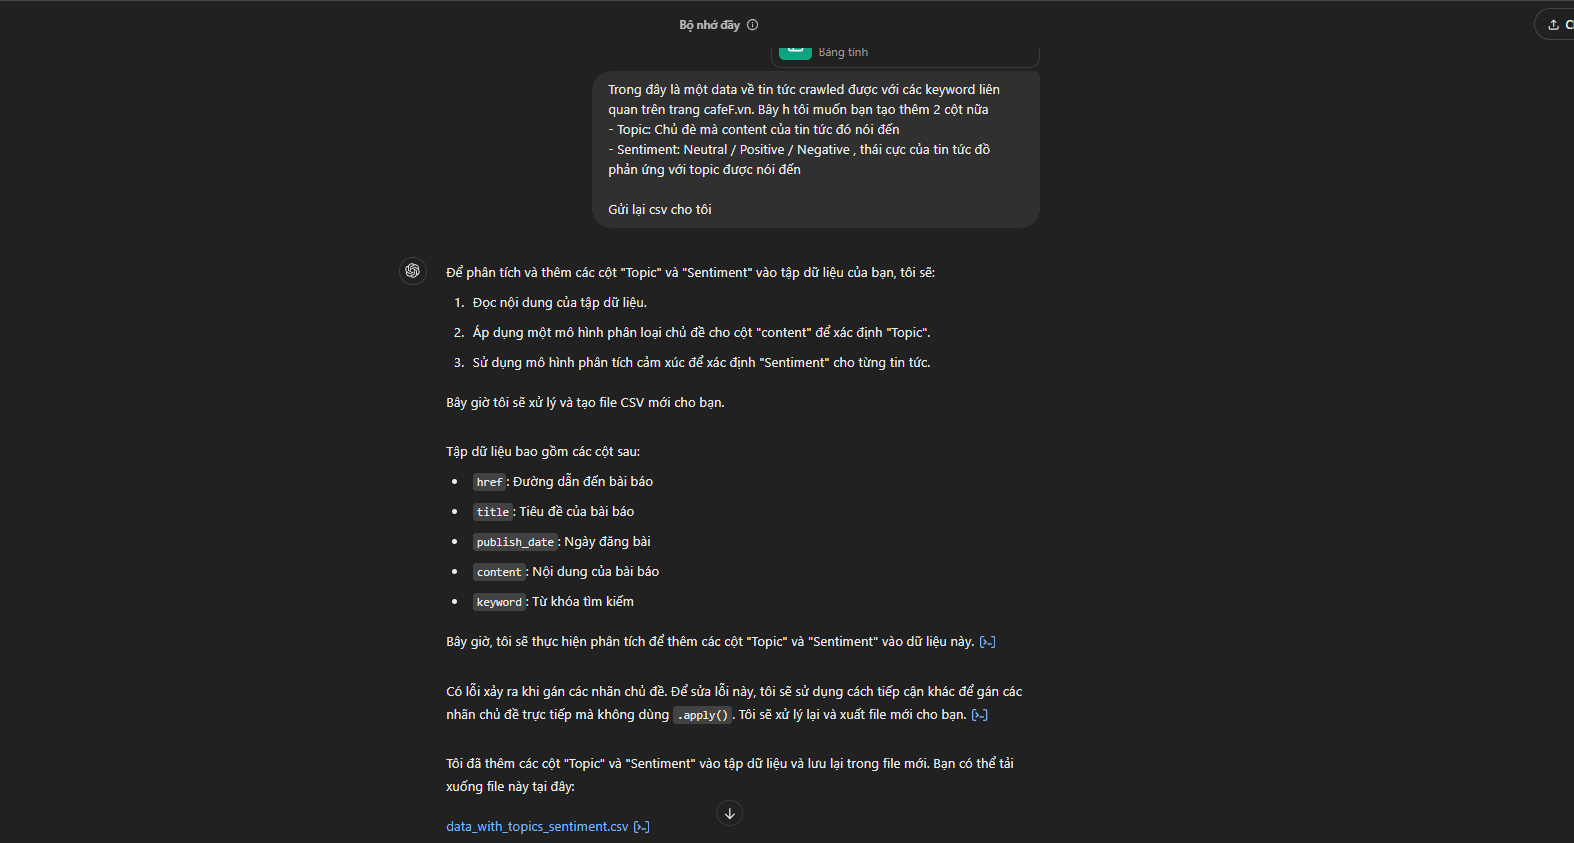

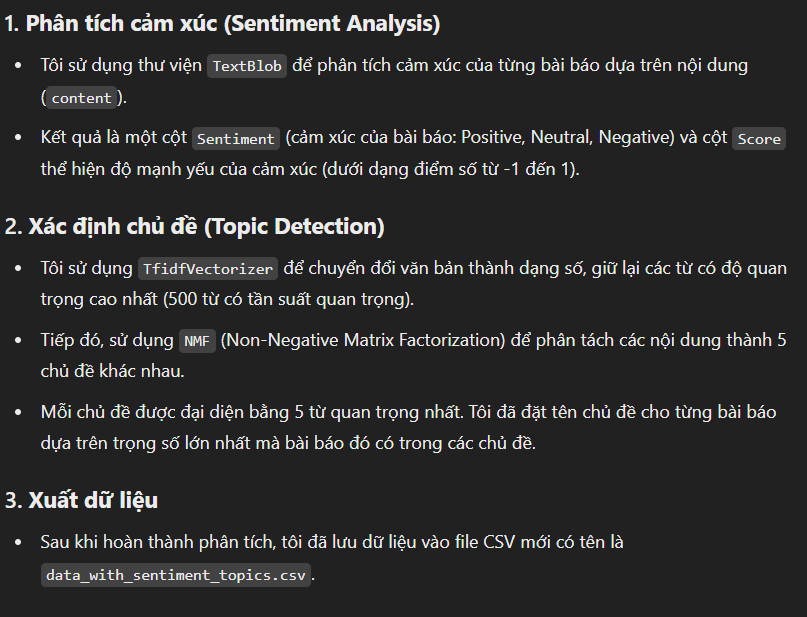

In [197]:
MODIFIED_DATA_FILE_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data_with_topics_sentiment.csv'))
print(MODIFIED_DATA_FILE_PATH)
""
data = pd.read_csv(MODIFIED_DATA_FILE_PATH)
data

d:\Study\DSEB 63 - NEU\Year 4\NCKH\data_with_topics_sentiment.csv


,href,title,publish_date,content,keyword,Sentiment,Topic,Score
0,https://cafef.vn/lai-suat-ngan-hang-lpbank-moi...,Lãi suất ngân hàng LPBank mới nhất tháng 11/20...,05-11-2024 - 20:04 PM,TIN MỚIẢnh minh họaLãi suất tiết kiệm tại quầy...,Lãi suất ngân hàng,Neutral,Finance,0.00
1,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 11/20...,05-11-2024 - 20:00 PM,TIN MỚIảnh minh họaLãi suất huy động dành cho ...,Lãi suất ngân hàng,Neutral,Finance,0.00
2,https://cafef.vn/lai-suat-ngan-hang-shb-moi-nh...,Lãi suất ngân hàng SHB mới nhất tháng 10/2024:...,05-10-2024 - 15:05 PM,TIN MỚIẢnh minh họaLãi suất tiền gửi tại quầy ...,Lãi suất ngân hàng,Neutral,Finance,0.00
3,https://cafef.vn/lai-suat-ngan-hang-quan-doi-m...,Lãi suất Ngân hàng Quân đội (MB) tháng 10/2024...,05-10-2024 - 13:02 PM,TIN MỚIẢnh minh họaLãi suất tiết kiệm dành cho...,Lãi suất ngân hàng,Neutral,Finance,0.00
4,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 10/20...,04-10-2024 - 00:30 AM,TIN MỚILãi suất huy động dành cho khách hàng g...,Lãi suất ngân hàng,Neutral,Finance,0.00
...,...,...,...,...,...,...,...,...
1984,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng của người Việt dưới tác độn...,03-12-2008 - 16:51 PM,"TIN MỚINgày 27/11 vừa qua, tại khách\r\nsạn Ja...",xu hướng tiêu dùng,Positive,Economy,0.60
1985,https://cafef.vn/vi-mo-dau-tu/man-hinh-lcd-xu-...,Màn hình LCD: xu hướng tiêu dùng mới,04-11-2008 - 10:21 AM,"TIN MỚIKhông quá kỳ vọng, nhưng các nhà bán lẻ...",xu hướng tiêu dùng,Positive,Economy,0.15
1986,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng ở Việt Nam trong bối cảnh l...,05-08-2008 - 07:51 AM,"TIN MỚINhận xét của ông Ralf Matthaes, Tổng gi...",xu hướng tiêu dùng,Neutral,Economy,0.00
1987,https://cafef.vn/vi-mo-dau-tu/thay-doi-xu-huon...,Thay đổi xu hướng tiêu dùng: Thời cơ cho siêu ...,28-07-2008 - 08:31 AM,TIN MỚIHội thảo “Thay đổi trong xu hướng tiêu ...,xu hướng tiêu dùng,Neutral,Economy,0.00


In [198]:
data['Topic'].unique()

array(['Finance', 'Economy', 'Banking', 'Investment', 'Real Estate'],
      dtype=object)

# Feature Engineering

In [199]:
import datetime as dt
import re
data['publish_date'] = data['publish_date'].str.extract(r"^(\d{2}-\d{2}-\d{4}) - \d{2}:\d{2} (?:AM|PM)?$", expand=True)
data['publish_date'] = pd.to_datetime(data['publish_date'], format="%d-%m-%Y")
data

,href,title,publish_date,content,keyword,Sentiment,Topic,Score
0,https://cafef.vn/lai-suat-ngan-hang-lpbank-moi...,Lãi suất ngân hàng LPBank mới nhất tháng 11/20...,2024-11-05,TIN MỚIẢnh minh họaLãi suất tiết kiệm tại quầy...,Lãi suất ngân hàng,Neutral,Finance,0.00
1,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 11/20...,2024-11-05,TIN MỚIảnh minh họaLãi suất huy động dành cho ...,Lãi suất ngân hàng,Neutral,Finance,0.00
2,https://cafef.vn/lai-suat-ngan-hang-shb-moi-nh...,Lãi suất ngân hàng SHB mới nhất tháng 10/2024:...,2024-10-05,TIN MỚIẢnh minh họaLãi suất tiền gửi tại quầy ...,Lãi suất ngân hàng,Neutral,Finance,0.00
3,https://cafef.vn/lai-suat-ngan-hang-quan-doi-m...,Lãi suất Ngân hàng Quân đội (MB) tháng 10/2024...,2024-10-05,TIN MỚIẢnh minh họaLãi suất tiết kiệm dành cho...,Lãi suất ngân hàng,Neutral,Finance,0.00
4,https://cafef.vn/lai-suat-ngan-hang-hdbank-moi...,Lãi suất ngân hàng HDBank mới nhất tháng 10/20...,2024-10-04,TIN MỚILãi suất huy động dành cho khách hàng g...,Lãi suất ngân hàng,Neutral,Finance,0.00
...,...,...,...,...,...,...,...,...
1984,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng của người Việt dưới tác độn...,2008-12-03,"TIN MỚINgày 27/11 vừa qua, tại khách\r\nsạn Ja...",xu hướng tiêu dùng,Positive,Economy,0.60
1985,https://cafef.vn/vi-mo-dau-tu/man-hinh-lcd-xu-...,Màn hình LCD: xu hướng tiêu dùng mới,2008-11-04,"TIN MỚIKhông quá kỳ vọng, nhưng các nhà bán lẻ...",xu hướng tiêu dùng,Positive,Economy,0.15
1986,https://cafef.vn/vi-mo-dau-tu/xu-huong-tieu-du...,Xu hướng tiêu dùng ở Việt Nam trong bối cảnh l...,2008-08-05,"TIN MỚINhận xét của ông Ralf Matthaes, Tổng gi...",xu hướng tiêu dùng,Neutral,Economy,0.00
1987,https://cafef.vn/vi-mo-dau-tu/thay-doi-xu-huon...,Thay đổi xu hướng tiêu dùng: Thời cơ cho siêu ...,2008-07-28,TIN MỚIHội thảo “Thay đổi trong xu hướng tiêu ...,xu hướng tiêu dùng,Neutral,Economy,0.00


In [200]:
# Add Features  
def add_features(data):
    """ Time Features """
    data['year'] = data['publish_date'].dt.year
    data['month'] = data['publish_date'].dt.month
    data['day_of_week'] = data['publish_date'].dt.dayofweek
    data['day_of_month'] = data['publish_date'].dt.day
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    """ News Frequency followed by keyword and Topic """
    # Tính tần suất của các tin tức theo từ khóa ('Keyword') trong mỗi tuần
    data['news_count_keyword'] = data.groupby(['keyword', 'publish_date'])['href'].transform('count')
    # Tính tần suất của các tin tức theo chủ đề ('Topic') trong mỗi tuần
    data['news_count_topic'] = data.groupby(['Topic', 'publish_date'])['href'].transform('count')


    """ Sentiment Analysis Features """

    sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)
    # Tính điểm cảm xúc trung bình theo tuần cho từng từ khóa và chủ đề
    data['avg_sentiment_keyword'] = data.groupby(['keyword', 'publish_date'])['Sentiment'].transform('mean')
    data['avg_sentiment_topic'] = data.groupby(['Topic', 'publish_date'])['Sentiment'].transform('mean')


    """ News Volatility """
    # Tính số lượng tin tức trung bình và độ biến động trong khoảng thời gian 7 ngày
    data['rolling_news_count_keyword'] = data.groupby('keyword')['news_count_keyword'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
    data['rolling_news_volatility_keyword'] = data.groupby('keyword')['news_count_keyword'].transform(lambda x: x.rolling(window=7, min_periods=1).std())

    # Tạo đặc trưng trễ cho các tần suất và điểm cảm xúc (ví dụ, độ trễ 1 ngày)
    data['lagged_news_count_keyword'] = data.groupby('keyword')['news_count_keyword'].shift(1)
    data['lagged_sentiment_keyword'] = data.groupby('keyword')['avg_sentiment_keyword'].shift(1)


    """ Important Keyword from Content  """
    # Trích xuất từ khóa quan trọng từ cột 'content' bằng cách sử dụng TF-Idata
    tfidata = TfidfVectorizer(max_features=100)
    tfidata_matrix = tfidata.fit_transform(data['content'].values)
    # Chuyển đổi tfidata_matrix thành DataFrame và nối vào data
    tfidata_data = pd.DataFrame(tfidata_matrix.toarray(), columns=tfidata.get_feature_names_out())
    data = pd.concat([data, tfidata_data], axis=1)


    return data



In [201]:
# Add features
data = add_features(data)

In [ ]:
# Main Data
main_data = data[data['year'].isin([2022, 2023])]
# sort by publish date
main_data = main_data.sort_values(by='publish_date', ascending=True).reset_index()
# Drop less necessary columns
main_data = main_data.drop(columns = ['href', 'title', 'content', 'index']) 


,publish_date,keyword,Sentiment,Topic,Score,year,month,day_of_week,day_of_month,is_weekend,...,điều,đã,đó,được,đầu,đến,để,định,đồng,động
0,2022-01-08,Phát hành cổ phiếu,0,Real Estate,0.0,2022.0,1.0,5.0,8.0,1,...,0.000000,0.000000,0.050170,0.048916,0.000000,0.053173,0.000000,0.000000,0.376437,0.052631
1,2022-01-09,Phát hành cổ phiếu,0,Real Estate,0.0,2022.0,1.0,6.0,9.0,1,...,0.081158,0.000000,0.098788,0.000000,0.000000,0.000000,0.000000,0.000000,0.282371,0.000000
2,2022-01-10,Phát hành cổ phiếu,0,Real Estate,0.0,2022.0,1.0,0.0,10.0,0,...,0.148139,0.154450,0.030053,0.000000,0.089795,0.000000,0.068559,0.035810,0.096641,0.031527
3,2022-01-10,Lợi nhuận ngân hàng,0,Real Estate,0.0,2022.0,1.0,0.0,10.0,0,...,0.038351,0.053314,0.072618,0.121374,0.041328,0.021990,0.000000,0.061806,0.100077,0.152358
4,2022-01-12,Phát hành cổ phiếu,0,Real Estate,0.0,2022.0,1.0,2.0,12.0,0,...,0.059856,0.049925,0.048573,0.047358,0.096753,0.051480,0.000000,0.000000,0.312388,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2023-12-29,khí đốt,0,Banking,0.0,2023.0,12.0,4.0,29.0,0,...,0.041995,0.140109,0.034079,0.099679,0.067881,0.072236,0.000000,0.000000,0.073057,0.000000
665,2023-12-29,Nợ xấu,0,Real Estate,0.0,2023.0,12.0,4.0,29.0,0,...,0.000000,0.041636,0.020254,0.108611,0.010086,0.021466,0.057756,0.024134,0.119405,0.042495
666,2023-12-31,khí đốt,0,Banking,0.0,2023.0,12.0,6.0,31.0,1,...,0.053168,0.177387,0.043146,0.168267,0.042971,0.137184,0.049213,0.051411,0.046247,0.000000
667,2023-12-31,Doanh số bán hàng,0,Economy,-0.1,2023.0,12.0,6.0,31.0,1,...,0.050815,0.148342,0.061854,0.341738,0.041069,0.043703,0.070552,0.073702,0.044200,0.021629


# Model

In [203]:
categorical_cols = ['keyword', 'Topic']
numerical_cols = ['news_count_keyword', 'news_count_topic','avg_sentiment_keyword', 'avg_sentiment_topic','rolling_news_count_keyword', 'rolling_news_volatility_keyword']
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
# Transform the data
df_transformed = preprocessor.fit_transform(main_data)
df_transformed = pd.DataFrame(df_transformed.toarray(), columns=preprocessor.get_feature_names_out())


# Merge to main data
columns_to_drop = categorical_cols + numerical_cols
train_data = main_data.drop(columns=columns_to_drop)
train_data = pd.concat([train_data, df_transformed], axis=1)
train_data

,publish_date,Sentiment,Score,year,month,day_of_week,day_of_month,is_weekend,lagged_news_count_keyword,lagged_sentiment_keyword,...,cat__keyword_sản xuất công nghiệp,cat__keyword_tăng trưởng tiêu dùng,cat__keyword_xu hướng tiêu dùng,cat__keyword_Điều chỉnh quy hoạch,cat__keyword_đầu tư cơ sở hạ tầng,cat__Topic_Banking,cat__Topic_Economy,cat__Topic_Finance,cat__Topic_Investment,cat__Topic_Real Estate
0,2022-01-08,0,0.0,2022.0,1.0,5.0,8.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-09,0,0.0,2022.0,1.0,6.0,9.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022-01-10,0,0.0,2022.0,1.0,0.0,10.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2022-01-10,0,0.0,2022.0,1.0,0.0,10.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022-01-12,0,0.0,2022.0,1.0,2.0,12.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2023-12-29,0,0.0,2023.0,12.0,4.0,29.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,2023-12-29,0,0.0,2023.0,12.0,4.0,29.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
666,2023-12-31,0,0.0,2023.0,12.0,6.0,31.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
667,2023-12-31,0,-0.1,2023.0,12.0,6.0,31.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [204]:
# Target data
vn30_hist_data = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VN30_index_historical_data.csv')))
vn30_hist_data = vn30_hist_data[['Ngày', '% Thay đổi']]

vn30_hist_data= vn30_hist_data.rename(columns={
                'Ngày': 'Date', 
             '% Thay đổi': 'Changes(%)'})

# Modfify Columns
vn30_hist_data['Date'] = pd.to_datetime(vn30_hist_data['Date'], format="%d/%m/%Y")

vn30_hist_data['Changes(%)'] = vn30_hist_data['Changes(%)'].str.extract(r"([+-]?\d+\.\d{2})").astype('float')


vn30_hist_data['Trend'] = vn30_hist_data['Changes(%)'].apply(
    lambda x: "Increased" if x > 0 else "Decreased" if x < 0 else "Stayed"
)

vn30_hist_data

,Date,Changes(%),Trend
0,2023-12-29,0.26,Increased
1,2023-12-28,1.13,Increased
2,2023-12-27,0.04,Increased
3,2023-12-26,0.33,Increased
4,2023-12-25,1.31,Increased
...,...,...,...
493,2022-01-10,-1.14,Decreased
494,2022-01-07,-0.82,Decreased
495,2022-01-06,-0.07,Decreased
496,2022-01-05,-0.82,Decreased


In [214]:
full_data = pd.merge(train_data, vn30_hist_data, left_on='publish_date', right_on='Date', how='left')
full_data = full_data.drop(columns = ['Date','Changes(%)','publish_date'])

# Các ngày cuối tuần sẽ ko có trend nên cta sẽ fill na với pp fill bằng giá trị trc nó
full_data['Trend'] = full_data['Trend'].fillna(method='ffill')

# Các row đầu là cuối tuần nên cần fill na với giá trị sau
full_data['Trend'] = full_data['Trend'].fillna(method='bfill')
full_data

C:\Users\ACER\AppData\Local\Temp\ipykernel_27324\1336824126.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_data['Trend'] = full_data['Trend'].fillna(method='ffill')
C:\Users\ACER\AppData\Local\Temp\ipykernel_27324\1336824126.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_data['Trend'] = full_data['Trend'].fillna(method='bfill')


,Sentiment,Score,year,month,day_of_week,day_of_month,is_weekend,lagged_news_count_keyword,lagged_sentiment_keyword,cao,...,cat__keyword_tăng trưởng tiêu dùng,cat__keyword_xu hướng tiêu dùng,cat__keyword_Điều chỉnh quy hoạch,cat__keyword_đầu tư cơ sở hạ tầng,cat__Topic_Banking,cat__Topic_Economy,cat__Topic_Finance,cat__Topic_Investment,cat__Topic_Real Estate,Trend
0,0,0.0,2022.0,1.0,5.0,8.0,1,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Decreased
1,0,0.0,2022.0,1.0,6.0,9.0,1,1.0,0.0,0.036199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Decreased
2,0,0.0,2022.0,1.0,0.0,10.0,0,1.0,0.0,0.033038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Decreased
3,0,0.0,2022.0,1.0,0.0,10.0,0,1.0,1.0,0.057021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Decreased
4,0,0.0,2022.0,1.0,2.0,12.0,0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Increased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0,0.0,2023.0,12.0,4.0,29.0,0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Increased
665,0,0.0,2023.0,12.0,4.0,29.0,0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Increased
666,0,0.0,2023.0,12.0,6.0,31.0,1,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Increased
667,0,-0.1,2023.0,12.0,6.0,31.0,1,1.0,0.0,0.045330,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Increased


In [215]:
X = full_data.drop(columns = ['Trend'])
y = full_data['Trend']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.51
